In [1]:
# Comment this out if you don't want to install matplotlib from this notebook
#!pip install matplotlib

# Comment this out if you don't want to install pylatexenc from this notebook
#!pip install pylatexenc

http://qutip.org/docs/4.1/guide/guide-bloch.html

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [4]:
import numpy as npa # to avoid interfering with Pennylane numpy

from numpy.random import default_rng
# rng = default_rng(seed) # seed for reproducibility

In [5]:
import cmath
import math
from math import pi
_EPS = 1e-10  # global variable used to chop very small numbers to zero

In [6]:
def chop(U, abs_tol=_EPS):
    Real_U = U
    if npa.abs(U) < abs_tol :
        Real_U = 0.0
    return Real_U

In [7]:
# This code is contributed by Alain Chancé
#
# This function returns Bloch coordinates given a statevector (complex vector) as input
#
# A normalized pure state |𝜓> = 𝛼|0> + 𝛽|1> can be written |𝜓> = cos𝜃/2 |0> + 𝑒xp(𝑖𝜑) * sin𝜃/2 |1> 
# where, since the arccosine of a positive number is a first quadrant angle:
# 𝜃 = 2 * cos**(−1) |𝛼|, 𝜃/2 ∈ [0, 𝜋/2]
# 𝜑 = arg(𝛽) − arg(𝛼), 𝜑 ∈ [0,2𝜋]
# A pure state |𝜓> can be represented by a vector on the so-called Bloch sphere with the following coordinates: 
# 𝑟 = [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
#
def ToBloch(s, check_amplitudes = True):
    
    # Input: params (list): vector of complex amplitudes
    # Output: 𝜃, 𝜑, r = [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    
    num_qubits = math.log2(len(s))
    
    # Check if param is a power of 2
    if num_qubits == 0 or not num_qubits.is_integer():
        raise Exception("Desired statevector (complex vector) length not a positive power of 2.")
    
    num_qubits = int(num_qubits)
    
    if num_qubits > 1:
        raise Exception("Only one statevector is allowed as input.")
    
    # Check if probabilities (amplitudes squared) sum to 1
    if check_amplitudes:
        if not math.isclose(sum(npa.absolute(s) ** 2), 1.0, abs_tol=_EPS):
            raise Exception("Sum of amplitudes-squared does not equal one.")
    
    phi = cmath.phase(s[1]) - cmath.phase(s[0])
    phi = chop(phi)
        
    theta = chop(2*math.acos(abs(s[0])))
    
    r1 = chop(math.sin(theta)*math.cos(phi))
    r2 = chop(math.sin(theta)*math.sin(phi))
    r3 = chop(math.cos(theta))
    r = (r1,r2,r3)
    
    return theta, phi, r

In [8]:
statevector = [1/math.sqrt(2),complex(0.0, 1/math.sqrt(2))]
print("Input statevector :", statevector)
(theta, phi, r) = ToBloch(statevector)
print("phi ", phi)
print("theta: ", theta)
print("r ", r)

Input statevector : [0.7071067811865475, 0.7071067811865475j]
phi  1.5707963267948966
theta:  1.5707963267948968
r  (0.0, 1.0, 0.0)


In [9]:
def random_bloch_pts(theta_min, theta_max, phi_min, phi_max, rng_seed=None, size=10):
    # Derived from random_qstates() in qhack21/hackaton/datas/State preparation.ipynb
    '''
    Creates a list of random Bloch points with angles drawn from a uniform distribution
    with some restricted range [a,b] obtained with (b - a) * random() + a
    '''
    
    # Input
    # theta_min: lower bound of angle theta
    # theta_max: Upper bound of angle theta
    # phi_min: lower bound of angle phi
    # phi_max: Upper bound of angle phi
    # rng_seed: range of seed for randum function
    # size: number of random Bloch points
    
    # Output
    # coords: Bloch vector coordinates [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    # angles: angles θ, ϕ, λ
    
    ## pick parameters at random
    rng = default_rng(rng_seed)
    state = []
    θ_vals, ϕ_vals, λ_vals = [], [], []
    x, y, z = [], [], []

    for i in range(size):
        θ = rng.random()*(theta_max-theta_min)+theta_min
        ϕ = rng.random()*(phi_max-phi_min)+phi_min
        λ = rng.random()*2*pi

        x.append(npa.sin(θ)*npa.cos(ϕ))
        y.append(npa.sin(θ)*npa.sin(ϕ))
        z.append(npa.cos(θ))
        coords = [c for c in zip(x, y, z)]
        
        θ_vals.append(θ)
        ϕ_vals.append(ϕ)
        λ_vals.append(λ)
        angles = [a for a in zip(θ_vals, ϕ_vals, λ_vals)]
    
    return None, coords, angles

In [10]:
# Create a random distribition of pure states on the Bloch sphere

squeeze = .65
theta_min=[pi / 5, pi / 3]
theta_max=[3 * pi / 5 * squeeze, pi / 2]
phi_min=[-pi / 5, pi / 3]
phi_max=[pi / 5 * squeeze, pi * squeeze]
rng_seed=[100, 999]
size=100

## QCATS as pure states on the Bloch sphere
qcats, cats_coords, cats_angles = random_bloch_pts(theta_min[0],
                                                 theta_max[0],
                                                 phi_min[0],
                                                 phi_max[0],
                                                 rng_seed[0],
                                                 size=size)

## QDOGS as pure states on the Bloch sphere
qdogs, dogs_coords, dogs_angles = random_bloch_pts(theta_min[1],
                                                 theta_max[1],
                                                 phi_min[1],
                                                 phi_max[1],
                                                 rng_seed[1],
                                                 size=size)


In [11]:
def plot_bloch_qcats_qdogs(x0, y0, z0, x1, y1, z1, marker='o'):
    # Display Qcats and Qdogs on Bloch sphere given their Bloch vector coordinates
    # This function does not require any quantum state to be provided as input
    # It is derived from plot_two_groups_of_qstates(theta_min, theta_max, phi_min, phi_max, qreg, rng_seed=None, size=10) 
    # in qhack21/hackaton/datas/State preparation.ipynb
    
    # Input
    # [x0, y0, z0] Qcats Bloch coordinates, [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    # [x1, y1, z1] Qdogs Bloch coordinates, [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    
    # Output
    # Bloch sphere drawn with matplotlib 
    
    # Create a sphere
    r = 1
    phi, theta = npa.mgrid[0.0:pi:100j, 0.0:2.0 * pi:100j]
    xs = r * npa.sin(phi) * npa.cos(theta)
    ys = r * npa.sin(phi) * npa.sin(theta)
    zs = r * npa.cos(phi)

    ## x, y are swapped in the visualization
   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.set_zlabel('Z')

    ax.set_xlim(-1, 1)
    ax.set_ylim(1, -1)
    ax.set_zlim(-1, 1)

    ax.plot_surface(xs,
                    ys,
                    zs,
                    rstride=1,
                    cstride=1,
                    color='aliceblue',
                    alpha=0.4,
                    linewidth=0)

    # ax.plot(npa.array([0, 0, 0]), npa.array([1.5, 0, 0]))
    ax.quiver(0, 0, 0, 0, 1.4, 0, arrow_length_ratio=.1)
    ax.quiver(0, 0, 0, 1.4, 0, 0, arrow_length_ratio=.1)
    ax.quiver(0, 0, 0, 0, 0, 1.4, arrow_length_ratio=.1)
    ax.scatter(x0, y0, z0, marker='o', c='r')
    ax.scatter(x1, y1, z1, marker='o', c='darkblue')
    plt.show()

    return

In [12]:
y0, x0, z0 = [c[0] for c in cats_coords], [c[1] for c in cats_coords], [c[2] for c in cats_coords]
y1, x1, z1 = [c[0] for c in dogs_coords], [c[1] for c in dogs_coords], [c[2] for c in dogs_coords]

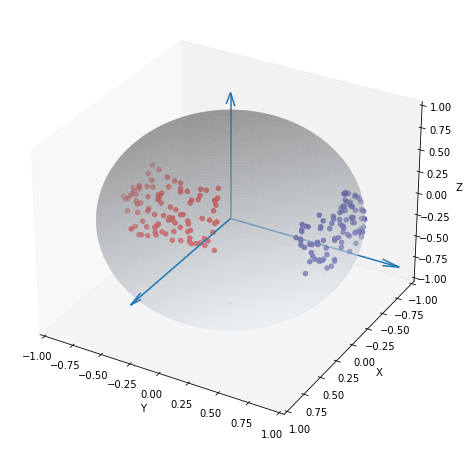

In [13]:
# Plot qcats as red points and qdogs as blue points on the Bloch sphere
plot_bloch_qcats_qdogs(x0, y0, z0, x1, y1, z1)

In [14]:
# Check qhack21/hackaton/datas/State preparation.ipynb, cat_states = pet_states(cats_angles)
# qcat statevectors
cat_states = [[0.86890622-5.55111512e-17j, 0.41604673-2.68154980e-01j],
 [0.93262165+0.j        , 0.32556414-0.15564332j], 
 [0.83108932+0.j        , 0.52400765-0.18629688j],
 [0.83660023+0.j        , 0.5452647 -0.05278691j],
 [0.84717264-5.55111512e-17j, 0.48797774-2.10181457e-01j]]

In [15]:
# Check qhack21/hackaton/datas/State preparation.ipynb, pet_states(dogs_angles)
# qdog statevectors
dog_states = [[0.79816156+0.j        , 0.04709576+0.60059979j],
 [ 0.75100202-2.77555756e-17j, -0.28385386+5.96173599e-01j],
 [ 0.82348682+0.j        , -0.15042074+0.54703112j],
 [0.71032145+0.j        , 0.19999501+0.67486698j],
 [0.78910384+5.55111512e-17j, 0.12555831+6.01290480e-01j]]

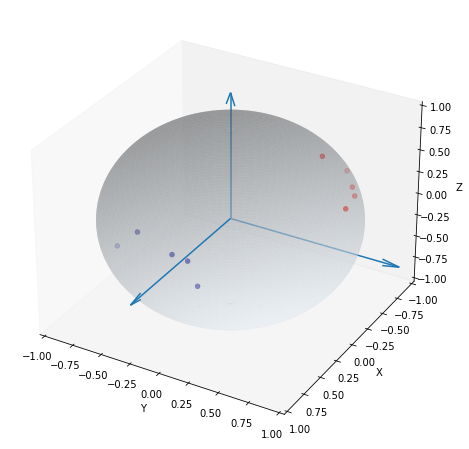

In [16]:
# Get qcats Bloch coordinates from their statevectors
statevectors = npa.array(cat_states)
n = npa.shape(statevectors)[0]
x0 = npa.zeros(n)
y0 = npa.zeros(n)
z0 = npa.zeros(n)
for i in range(n):
    (theta, phi, r) = ToBloch(statevectors[i], check_amplitudes = False)
    x0[i] = r[0]
    y0[i] = r[1]
    z0[i] = r[2]

# Get qdogs Bloch coordinates from their statevectors
statevectors = npa.array(dog_states)
n = npa.shape(statevectors)[0]
x1 = npa.zeros(n)
y1 = npa.zeros(n)
z1 = npa.zeros(n)
for i in range(n):
    (theta, phi, r) = ToBloch(statevectors[i], check_amplitudes = False)
    x1[i] = r[0]
    y1[i] = r[1]
    z1[i] = r[2]

# Plot qcats as red points and qdogs as blue points on the Bloch sphere
plot_bloch_qcats_qdogs(x0, y0, z0, x1, y1, z1)